In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
font = {'family' : 'verdana',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


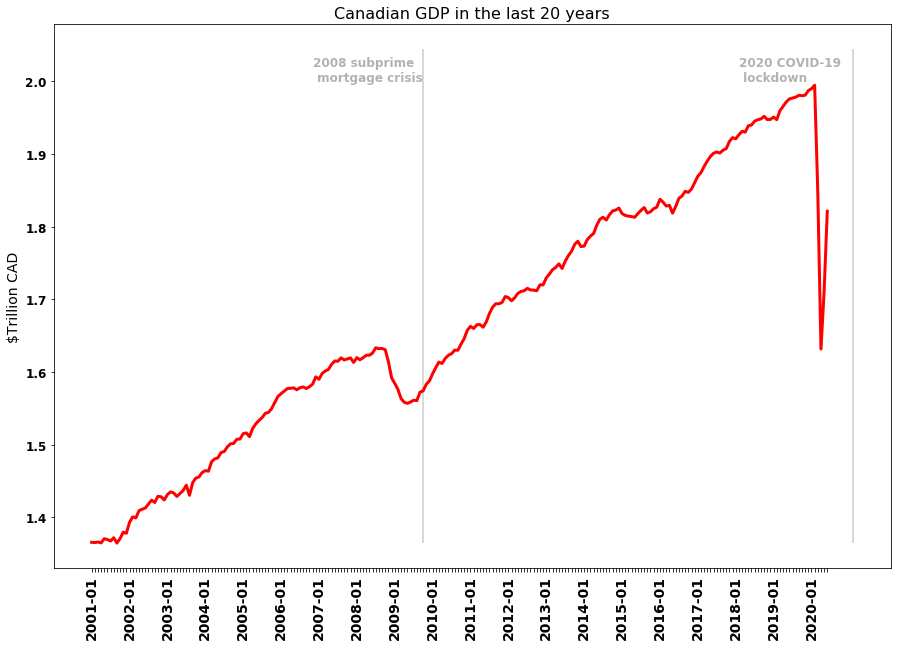

In [27]:
# overall GDP
# citation : Statistics Canada.  Table: 36-10-0434-02
# Gross domestic product (GDP) at basic prices, by industry, monthly, growth rates (x 1,000,000)


# df = pd.read_csv('data/overallGDP_canada.csv') #PREVIOUS VERSION
df = pd.read_csv('data/overallGDP_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()



fig, ax = plt.subplots(figsize = (15,10))
# plt.figure()
ax.set_title('Canadian GDP in the last 20 years', fontsize = 16)
ax.set_ylabel('$Trillion CAD')
ax.yaxis.label.set_size(14)

industry = industries[0]
columns = ['ref_date', 'value']

temp_df = df[df['north american industry classification system (naics)']==industry][columns]
first = temp_df.iloc[0][1]

temp_df['change'] = temp_df['value'] - first
temp_df['v_change'] = temp_df['change']/1_000

x= temp_df['ref_date']
y= temp_df['value']/1_000_000
ax.plot(x,y, color = 'red', alpha = 1, label='Canadian GDP', linewidth=3)
# plt.xticks(x, rotation=90)

        
        
ax.vlines(x=105, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s1 = '2008 subprime \n mortgage crisis'
ax.text(x=70, y = 2, s=s1, alpha = 0.3)


ax.vlines(x=241, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s2 = '2020 COVID-19 \n lockdown'
ax.text(x=205, y = 2, s=s2, alpha = 0.3)

# plt.plot(xx,yy, label = "Projected Recovery", color = 'green', alpha = 0.7)
# ax.set_xticks(rotation=90)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

_, labels = plt.xticks()

for i in range(0,len(labels)):
    if i % 12 != 0:
        labels[i].set_visible(False)

        
# ax.yaxis.label.set_size(14)
# ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)


# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.legend()
plt.savefig('figures/figure_1_Canada_overall_GDP.png', dpi=300)
# plt.show()


# GDP BY INDUSTRY

In [4]:
industry_map = {
    'Agriculture, forestry, fishing and hunting [11]':'Agriculture',
    'Mining, quarrying, and oil and gas extraction [21]' : 'Mining, Oil, and Gas',
    'Utilities [22]': 'Utilities',
    'Construction [23]': 'Construction',
    'Manufacturing [31-33]' : 'Manufacturing',
    'Wholesale trade [41]' : 'Wholesale trade',
    'Retail trade [44-45]' : 'Retail',
    'Transportation and warehousing [48-49]': 'Transportation',
    'Information and cultural industries [51]': 'Information and Data',
    'Finance and insurance [52]': 'Finance and Insurance',
    'Real estate and rental and leasing [53]': 'Real Estate',
    'Professional, scientific and technical services [54]': 'Proefessional Services',
    'Management of companies and enterprises [55]': 'Enterprise Management',
    'Administrative and support, waste management and remediation services [56]': 'Administrative Support',
    'Educational services [61]':'Education',
    'Health care and social assistance [62]':'Healthcare',
    'Arts, entertainment and recreation [71]':'Entertainment',
    'Accommodation and food services [72]':'Accommodation and Food',
    'Other services (except public administration) [81]':'Other',
    'Public administration [91]': 'Public Administration'
       
    
}

Agriculture, forestry, fishing and hunting [11]
Mining, quarrying, and oil and gas extraction [21]
Utilities [22]
Construction [23]
Manufacturing [31-33]
Wholesale trade [41]
Retail trade [44-45]
Transportation and warehousing [48-49]
Information and cultural industries [51]
Finance and insurance [52]
Real estate and rental and leasing [53]
Professional, scientific and technical services [54]
Management of companies and enterprises [55]
Administrative and support, waste management and remediation services [56]
Educational services [61]
Health care and social assistance [62]
Arts, entertainment and recreation [71]
Accommodation and food services [72]
Other services (except public administration) [81]
Public administration [91]


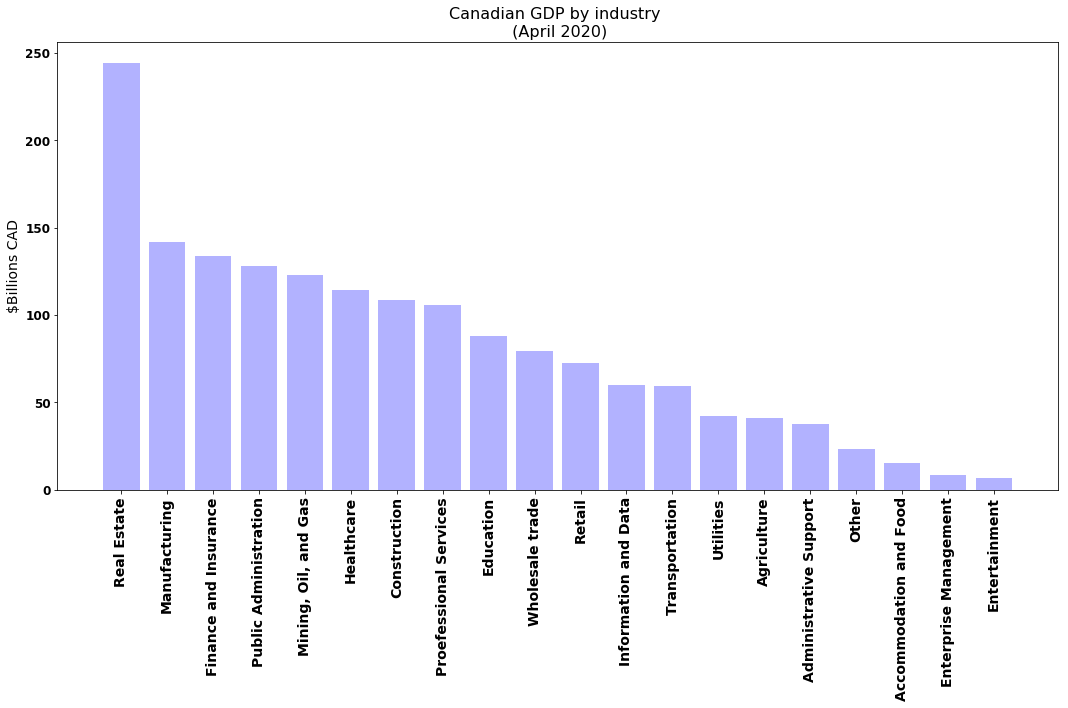

In [28]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

# df = pd.read_csv('data/gdp_canada2.csv') #PREVIOUS VERSION
df = pd.read_csv('data/overallGDP_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (15,10))

ax.set_title('Canadian GDP by industry \n (April 2020)', fontsize = 16)
ax.set_ylabel('$Billions CAD')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

cumulative_by_industry = {}
for industry in industries[16:]:
    print(industry)
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    cumulative_by_industry[industry]= temp_df[temp_df['ref_date']=='2020-04']['value'].values[0]
    
stacked = pd.DataFrame.from_dict(cumulative_by_industry, orient='index')
stacked.reset_index(drop=False, inplace=True)
stacked.rename(columns={'index':'industry', 0:'GDP ($Billions)'}, inplace=True)
stacked.sort_values('GDP ($Billions)', ascending=False, inplace=True)
stacked['GDP ($Billions)'] = stacked['GDP ($Billions)']/1000
stacked['industry'] = stacked['industry'].apply(lambda x: industry_map[x]) # removes square bracket


sizes = stacked['GDP ($Billions)']
labels = stacked['industry']


ax.bar(x=labels, height=sizes, alpha = 0.3, color = 'blue')


ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)


plt.tight_layout()

plt.savefig('figures/figure_2_Canada_overall_GDP_by_industry.png', dpi=300)

plt.show()

In [6]:
# # GDP
# # citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

# df = pd.read_csv('data/gdp_canada2.csv')
# df.columns = [x.lower() for x in df.columns]
# industries = df['north american industry classification system (naics)'].unique()

# # industry = industries[0]
# fig, ax = plt.subplots(figsize = (10,10))

# ax.set_title('Canadian GDP since 2019 by industry')
# ax.set_ylabel('$Billions CAD')
# for tick in ax.get_xticklabels():
#     tick.set_rotation(90)
    
# for industry in industries[16:]:
#     columns = ['ref_date', 'value']
#     temp_df = df[df['north american industry classification system (naics)']==industry][columns]
#     first = temp_df.iloc[0][1]

#     temp_df['change'] = temp_df['value'] - first
#     temp_df['v_change'] = temp_df['change']/1_000
    
#     x= temp_df['ref_date']
# #     y= temp_df['v_change']
#     y= temp_df['value']/1_000
    
#     ax.plot(x,y, alpha = 1, label=industry)
#     ax.annotate(industry_map[industry],(x.iloc[-1], y.iloc[-1]) )

# #     if temp_df.iloc[0][-3] > 119000:
# #         ax.plot(x,y, alpha = 1, label=industry)
# #         ax.annotate(industry_map[industry],(x.iloc[-1], y.iloc[-1]) )


# #     else:
# #         plt.plot(x,y, alpha = 0.1, label=industry)

    
# # ax.legend( bbox_to_anchor=(1.1, 1.05))

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# plt.show()

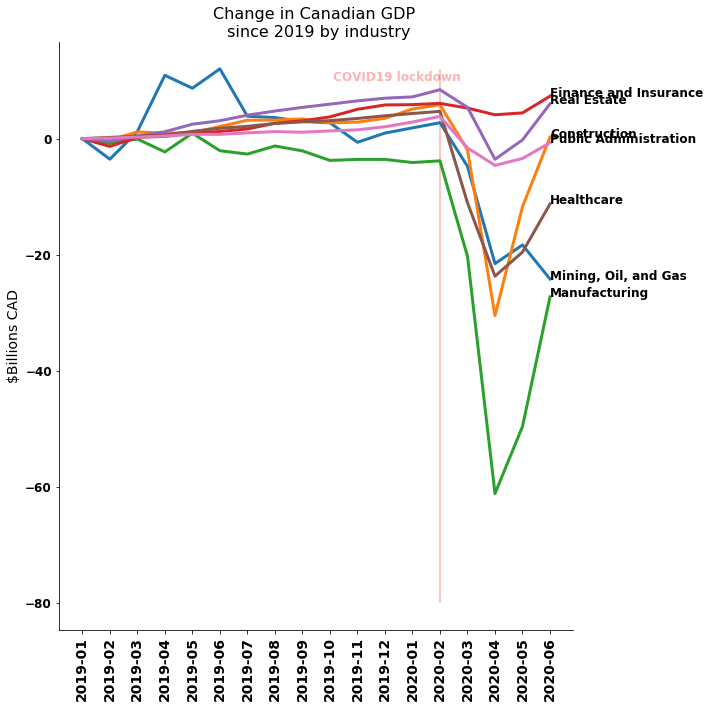

In [32]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

# df = pd.read_csv('data/gdp_canada2.csv') #PREVIOUS VERSION
df = pd.read_csv('data/gdp_canada4.csv') 


df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Change in Canadian GDP \n since 2019 by industry', fontsize=16)
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
for industry in industries[16:]:

    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
#     y= temp_df['v_change']
    y= temp_df['change']/1_000

    if temp_df.iloc[0][-3] > 119000:
        ax.plot(x,y, alpha = 1, label=industry, linewidth=3)
        ax.annotate(industry_map[industry],(x.iloc[-1], y.iloc[-1]) )


#     else:
#         plt.plot(x,y, alpha = 0.1, label=industry)

ax.vlines(x=13, ymin=-80, ymax=12, alpha = 0.3, color='red')
# ax.axvspan(0, 13, alpha=0.1, color='grey')

s2 = 'COVID19 lockdown'
ax.text(x=9.1, y = 10, s=s2, alpha = 0.3, color='red')
  
# ax.legend( bbox_to_anchor=(1.1, 1.05))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)
plt.tight_layout()

plt.savefig('figures/figure_3_Canada_overall_GDP_change_by_industry.png', dpi=300, bbox_inches='tight')

plt.show()

In [8]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Food manufacturing [311]
Beverage and tobacco product manufacturing [312]
Textile, clothing and leather product manufacturing [31X]
Wood product manufacturing [321]
Paper manufacturing [322]
Printing and related support activities [323]
Petroleum and coal product manufacturing [324]
Chemical manufacturing [325]
Plastics and rubber products manufacturing [326]
Non-metallic mineral product manufacturing [327]
Primary metal manufacturing [331]
Fabricated metal product manufacturing [332]
Machinery manufacturing [333]
Computer and electronic product manufacturing [334]
Electrical equipment, appliance and component manufacturing [335]
Transportation equipment manufacturing [336]
Furniture and related product manufacturing [337]
Miscellaneous manufacturing [339]


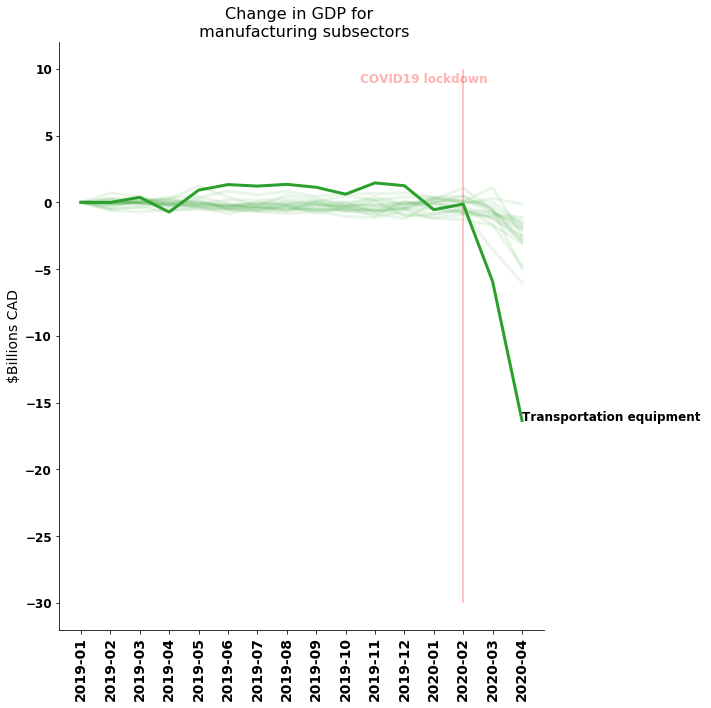

In [34]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Change in GDP for \n manufacturing subsectors', fontsize = 16)
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

color = '#2ca02c'
    
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[3' in industry:
        print(industry)
        if '[336]' in industry:
            ax.plot(x,y, alpha = 1, label=industry, color=color, linewidth=3)
            ax.annotate(industry[:industry.find('man')],(x.iloc[-1], y.iloc[-1]) )
        else:
            ax.plot(x,y, alpha = 0.1, label=industry, color=color, linewidth=3)
            
#         ax.plot(x,y, alpha = 1, label=industry, color=color)
#         ax.annotate(industry[:industry.find('[')],(x.iloc[-1], y.iloc[-1]) )



ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)


plt.tight_layout()

plt.savefig('figures/figure_4_Canada_overall_GDP_change_manufacturing.png', dpi=300, bbox_inches='tight')


plt.show()

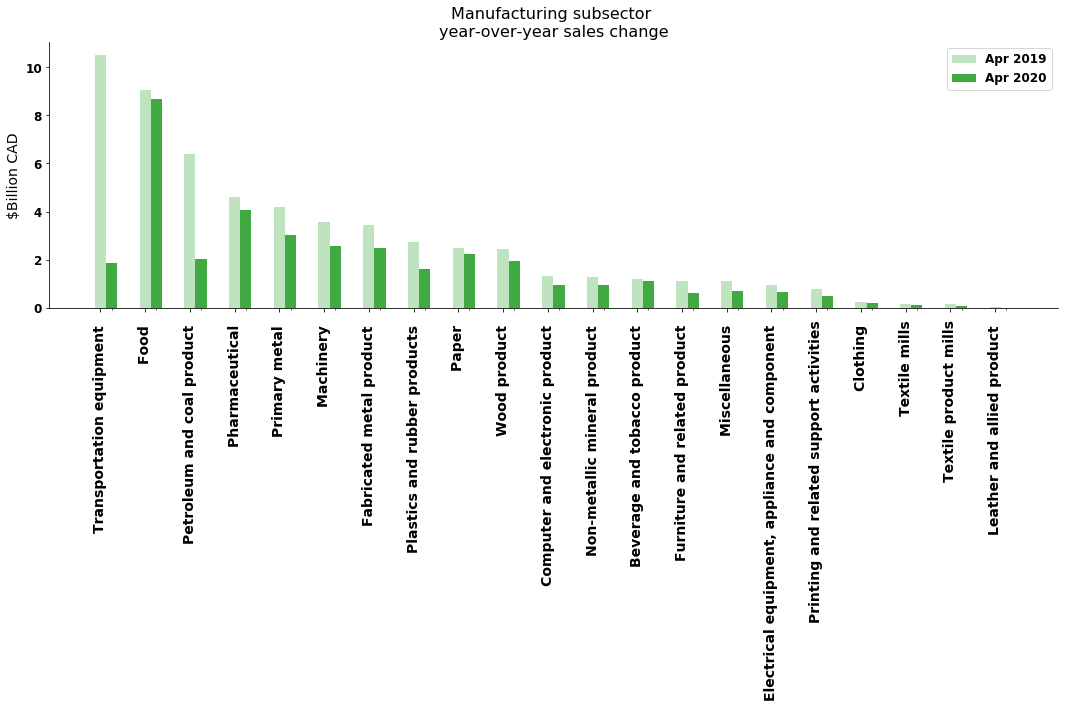

In [10]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/manufcaturing_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (15,10))

ax.set_title('Manufacturing subsector \nyear-over-year sales change', fontsize=16)
ax.set_ylabel('$Billion CAD')

color = '#2ca02c'

sales_dict = {}

for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[(df['north american industry classification system (naics)']==industry) & (df['principal statistics']=='Sales of goods manufactured (shipments)')][columns]
#     first = temp_df.iloc[0][1]
    temp_df = temp_df[temp_df['ref_date'].str.contains('04')]
#     temp_df['change'] = temp_df['value'] - first
#     temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['value']/1_000_000
    
#     print(industry)
#     if '[325]' in industry or '[336]' in industry or '[324]' in industry or '[311]' in industry:
#         sales_dict[industry] = {}
#         sales_dict[industry]['2019'] = temp_df.iloc[0][1]
#         sales_dict[industry]['2020'] = temp_df.iloc[1][1]

    sales_dict[industry] = {}
    sales_dict[industry]['2019'] = temp_df.iloc[0][1]
    sales_dict[industry]['2020'] = temp_df.iloc[1][1]

        
        
# grouped bar chart
width = 0.25
bars1 = [v['2019']/1_000_000 for k ,v in sales_dict.items()]
bars2 = [v['2020']/1_000_000 for k ,v in sales_dict.items()]
pre_labels = [k[:k.find('[')] for k ,v in sales_dict.items()]
difference = [x-y for x,y in zip(bars1,bars2)]
labels = [p.replace('manufacturing', '') for p in pre_labels]
labels = [p.replace('Chemical', 'Pharmaceutical') for p in labels]

myorder = sorted(range(len(bars1)), key=lambda k: bars1[k], reverse=True)

difference = [difference[i] for i in myorder]
bars1 = [bars1[i] for i in myorder]
bars2 = [bars2[i] for i in myorder]
labels = [labels[i] for i in myorder]

r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]

ax.bar(r1, bars1, width = width, label = 'Apr 2019', color = color, alpha=0.3)
ax.bar(r2, bars2, width = width, label = 'Apr 2020', color = color, alpha=0.9)

# ax.set_xlabel('subsector')
ax.set_xticks([r + width for r in
           range(len(bars1))], ['A', 'B', 'C', 'D'])

x = np.arange(len(labels))  # the label locations
ax.set_xticks(x)
ax.set_xticklabels(labels)
check = ax.get_xticklabels()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)


plt.tight_layout()

# plt.legend(bbox_to_anchor=(2.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')
plt.legend()

plt.savefig('figures/figure_5_Canada_manufacturing_yoy_sales.png', dpi=300, bbox_inches='tight')

plt.show()

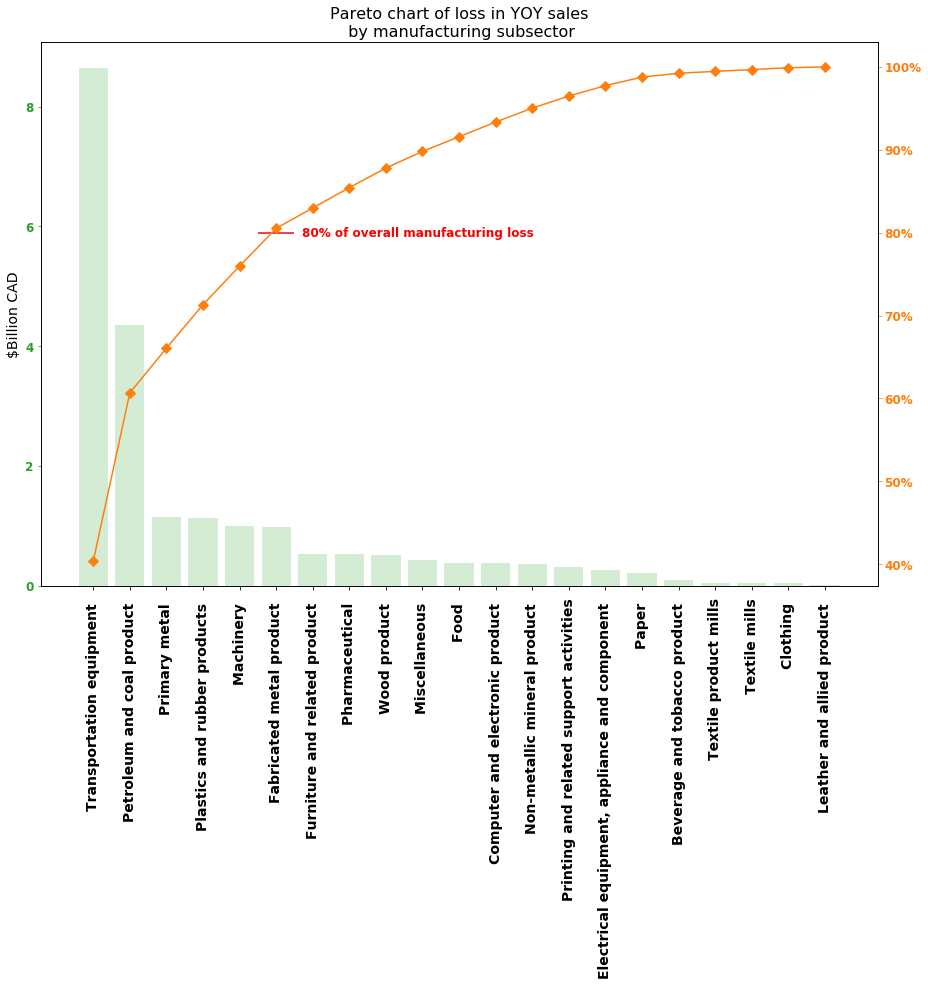

In [11]:
from matplotlib.ticker import PercentFormatter
color = '#2ca02c'

myorder = sorted(range(len(bars1)), key=lambda k: difference[k], reverse=True)

labels = [labels[i] for i in myorder]
difference = [difference[i] for i in myorder]

df_pareto = pd.DataFrame({'label':labels, 'difference':difference})
df_pareto.index = labels
df_pareto['percent'] = df_pareto['difference'].cumsum()/df_pareto['difference'].sum()*100


fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Pareto chart of loss in YOY sales\n by manufacturing subsector', fontsize=16)
ax.set_ylabel('$Billion CAD')

ax.bar(df_pareto.index, df_pareto["difference"], color=color, alpha = 0.2)
ax2 = ax.twinx()
ax2.plot(df_pareto.index, df_pareto["percent"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors=color)
ax2.tick_params(axis="y", colors="C1")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax2.hlines(y=80, xmin=4.5, xmax = 5.5, color = 'red')
text = '80% of overall manufacturing loss'
ax2.annotate(text, (5.7, 79.5), color='red')
    
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)

plt.savefig('figures/figure_6_Canada_manufacturing_pareto.png', dpi=300, bbox_inches='tight')

plt.show()

# df_pareto


Ambulatory health care services [621]
Hospitals [622]
Nursing and residential care facilities [623]
Social Assistance [624]


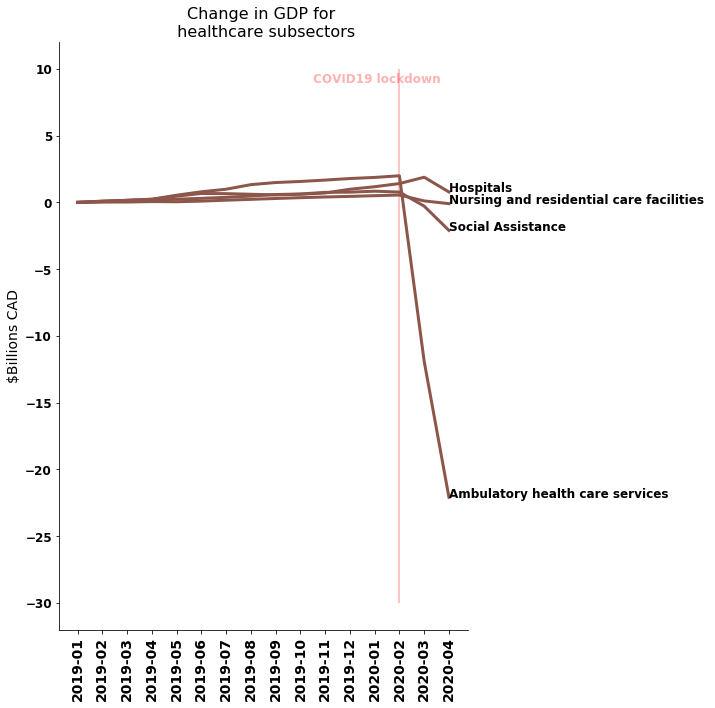

In [12]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Change in GDP for \n healthcare subsectors', fontsize=16)
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
color = '#8c564b'
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[62' in industry:
        print(industry)
        ax.plot(x,y, alpha = 1, label=industry, color=color, linewidth=3)
        ax.annotate(industry[:industry.find('[')],(x.iloc[-1], y.iloc[-1]) )


#     else:
#         ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(1.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

plt.savefig('figures/figure_7_Canada_healthcare.png', dpi=300, bbox_inches='tight')


plt.show()

Credit intermediation and monetary authorities [52X]
Insurance carriers and related activities [524]
Financial investment services, funds and other financial vehicles [52A]


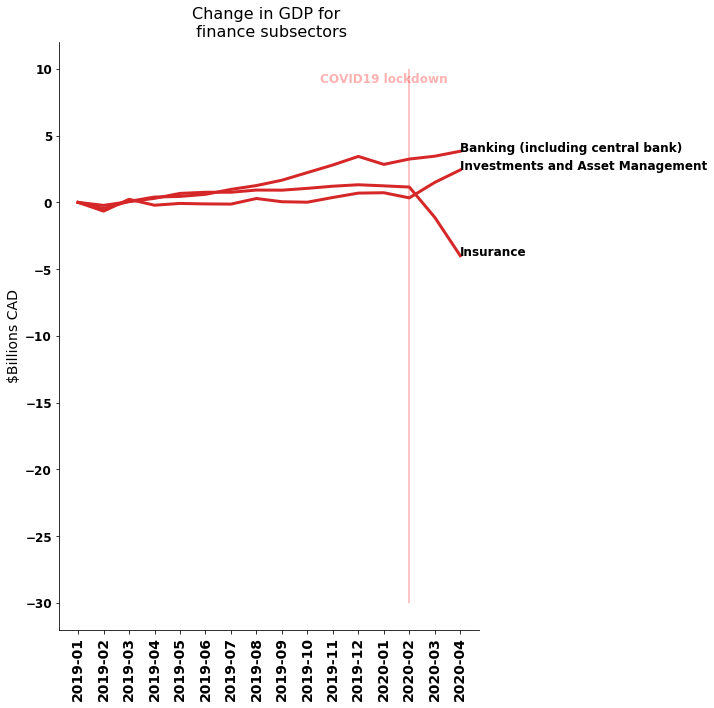

In [13]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

bank_map = {
    'Credit intermediation and monetary authorities [52X]' : 'Banking (including central bank)',
    'Insurance carriers and related activities [524]' : 'Insurance',
    'Financial investment services, funds and other financial vehicles [52A]' : 'Investments and Asset Management'
    
}


df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Change in GDP for \n finance subsectors', fontsize=16)
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
color = '#d62728'
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[52' in industry:
        print(industry)
        ax.plot(x,y, alpha = 1, label=industry, color=color, linewidth=3)
        ax.annotate(bank_map[industry],(x.iloc[-1], y.iloc[-1]) )


#     else:
#         ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(1.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

plt.savefig('figures/figure_8_Canada_finance_GDP.png', dpi=300, bbox_inches='tight')


plt.show()

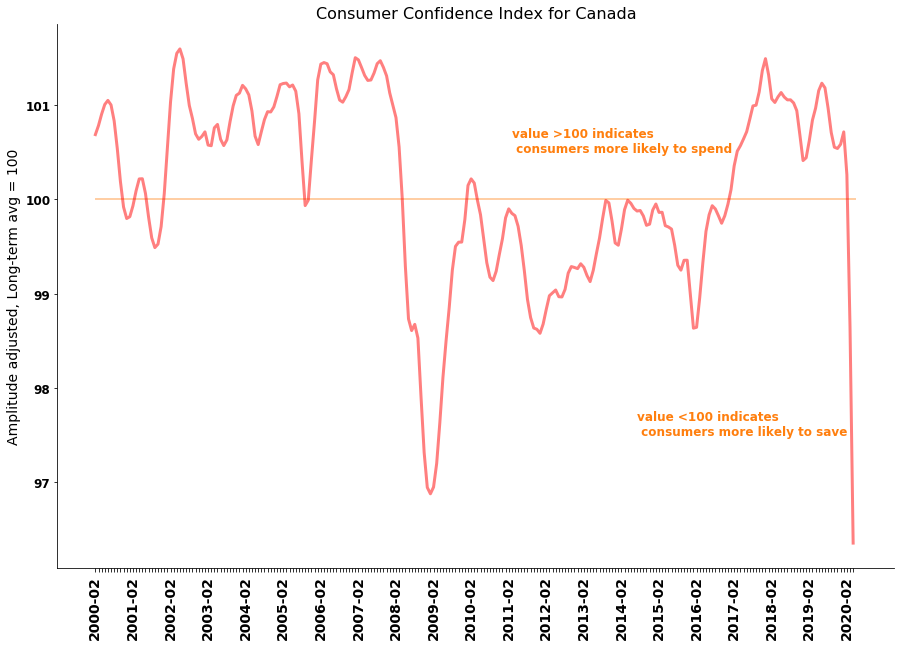

In [14]:
#consumer confidence index
# citation: 

df_cci = pd.read_csv('data/CCI_canada.csv')
df_cci.columns = [x.lower() for x in df_cci.columns]

fig, ax = plt.subplots(figsize = (15,10))
# plt.figure()
ax.set_title('Consumer Confidence Index for Canada', fontsize=16)
ax.set_ylabel('Amplitude adjusted, Long-term avg = 100')
ax.yaxis.label.set_size(14)


x = df_cci['time']
y = df_cci['value']
    
ax.plot(x,y, color='red', linewidth=3, alpha = 0.5)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

_, labels = plt.xticks()

for i in range(0,len(labels)):
    if i % 12 != 0:
        labels[i].set_visible(False)

ax.tick_params(axis='x', labelsize=14)

ax.hlines(y=100, xmin=0, xmax = len(x), color = 'C1', alpha = 0.5)
text1 = 'value >100 indicates \n consumers more likely to spend'
text2 = 'value <100 indicates \n consumers more likely to save'
ax.annotate(text1, (len(x)-110, 100.5), color='C1')
ax.annotate(text2, (len(x)-70, 97.5), color='C1')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig('figures/figure_9_Canada_CCI.png', dpi=300, bbox_inches='tight')

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

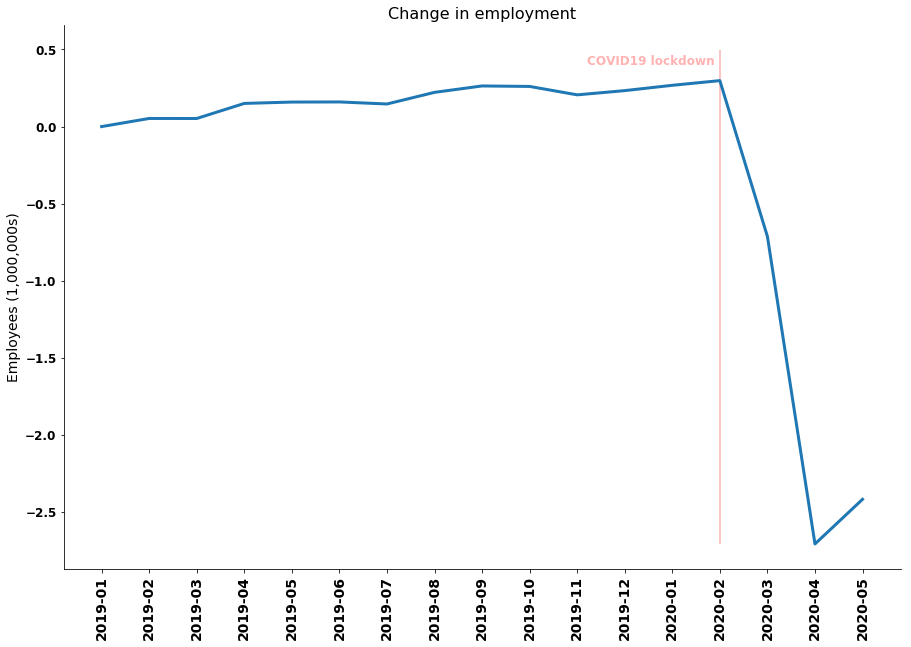

In [15]:
#Employment
# citation: Statistics Canada.  Table  14-10-0355-01   Employment by industry, monthly, seasonally adjusted and unadjusted, and trend-cycle (x 1,000)



df = pd.read_csv('data/employment_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()
# industries = [i for i in industries if i[-1]==']']  #needs this step to remove aggrregate classes such as all industries


fig, ax = plt.subplots(figsize = (15,10))
# plt.figure()
ax.set_title('Change in employment', fontsize=16)
ax.set_ylabel('Employees (1,000,000s)')
ax.yaxis.label.set_size(14)

for industry in industries:
    if 'Total' in industry:
        columns = ['ref_date', 'value']
        temp_df = df[df['north american industry classification system (naics)']==industry][columns]
        first = temp_df.iloc[0][1]
        temp_df['change'] = temp_df['value'] - first
    #     temp_df['change'] = temp_df['value'].pct_change()
    #     temp_df['v_change'] = temp_df['change']*temp_df['value']

        x= temp_df['ref_date']
        y= temp_df['change']/1000

        if temp_df.iloc[-2][-1] < -190:
            ax.plot(x,y, alpha = 1, label=industry[:industry.find('[')], color='C0', linewidth=3)
        else:
            ax.plot(x,y, alpha = 0.1, label=industry[:industry.find('[')])

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.tick_params(axis='x', labelsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.vlines(x=13, ymin=y.min(), ymax=y.max()+0.2, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=10.2, y = 0.4, s=s2, alpha = 0.3, color='red')

            
plt.savefig('figures/figure_10_Canada_employment.png', dpi=300, bbox_inches='tight')

# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.legend()
plt.show()

In [16]:
temp_df

,ref_date,value,change
0,2019-01,18891.4,0.0
1,2019-02,18944.1,52.7
2,2019-03,18943.9,52.5
3,2019-04,19041.6,150.2
4,2019-05,19050.4,159.0
5,2019-06,19051.2,159.8
6,2019-07,19037.9,146.5
7,2019-08,19113.3,221.9
8,2019-09,19154.9,263.5
9,2019-10,19151.7,260.3


Residential building construction [23A]
Non-residential building construction [23B]
Repair construction [23D]
Engineering and other construction activities [23X]


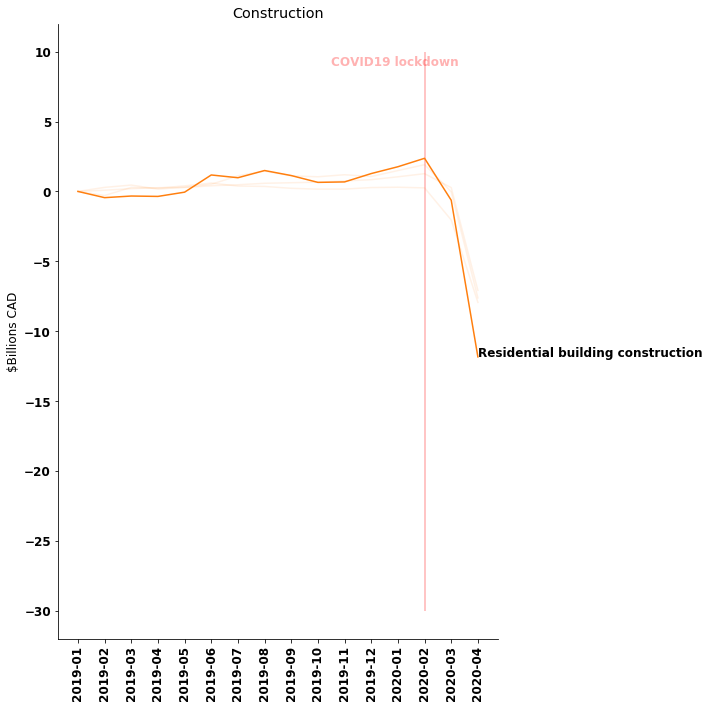

In [17]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Construction')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

color = '#ff7f0e'
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[23' in industry:
        print(industry)
        if '23A' in industry:
            ax.plot(x,y, alpha = 1, label=industry, color=color)
            ax.annotate(industry[:industry.find('[')],(x.iloc[-1], y.iloc[-1]) )
        else:
            ax.plot(x,y, alpha = 0.1, label=industry, color=color)


ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(1.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

plt.show()

In [18]:
sum(difference)/len(difference)

1.0197444285714283

Oil and gas extraction [211]
Mining and quarrying (except oil and gas) [212]
Support activities for mining and oil and gas extraction [213]


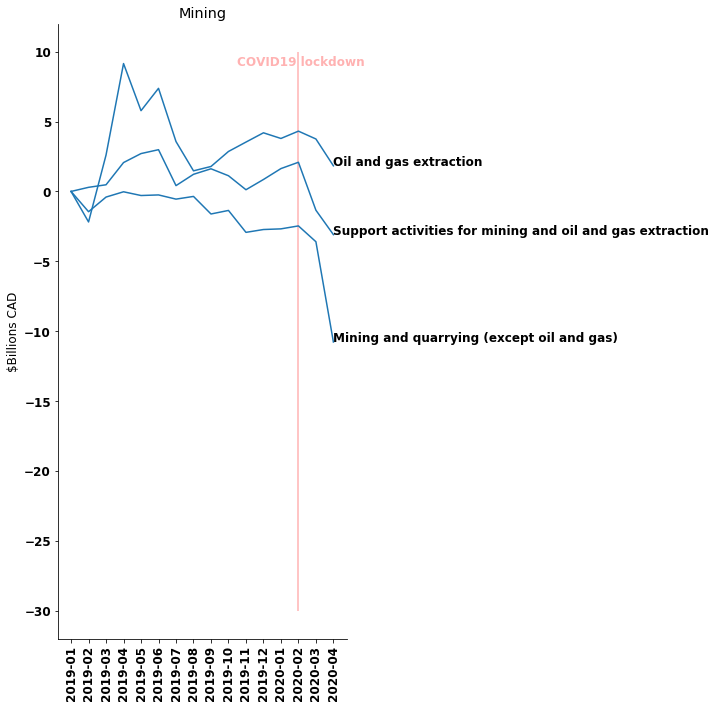

In [19]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Mining')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
color = '#1f77b4'
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[21' in industry:
        print(industry)
        ax.plot(x,y, alpha = 1, label=industry, color = color)
        ax.annotate(industry[:industry.find('[')],(x.iloc[-1], y.iloc[-1]) )


#     else:
#         ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(1.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

plt.show()

Federal government public administration [911]
Provincial and territorial public administration [912]
Local, municipal and regional public administration [913]
Aboriginal public administration [914]


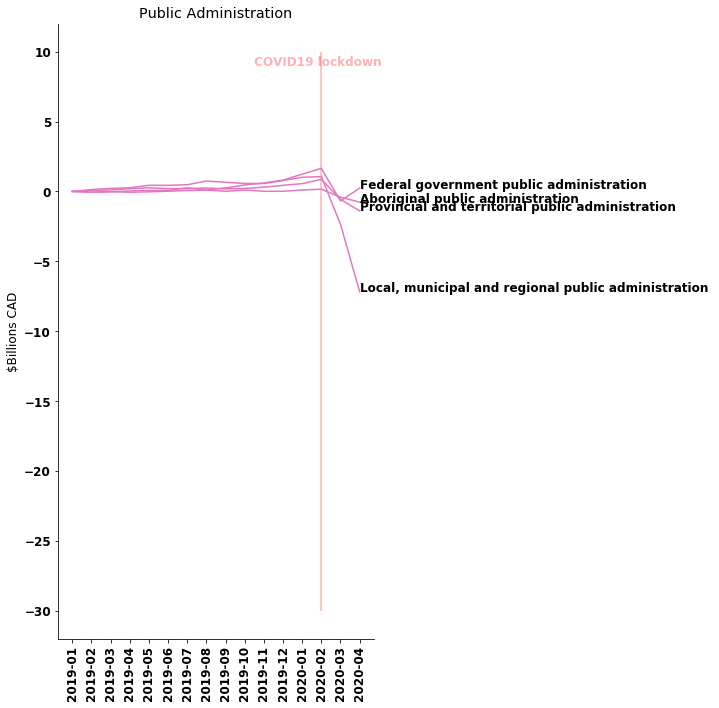

In [20]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Public Administration')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

color = '#e377c2'
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[91' in industry:
        print(industry)
        ax.plot(x,y, alpha = 1, label=industry, color=color)
        ax.annotate(industry[:industry.find('[')],(x.iloc[-1], y.iloc[-1]) )


#     else:
#         ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(1.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

plt.show()

Legal, accounting and related services [541A]
Architectural, engineering and related services [5413]
Computer systems design and related services [5415]
Advertising, public relations, and related services [5418]
Other professional, scientific and technical services including scientific research and development [541B]


/home/eric/miniconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


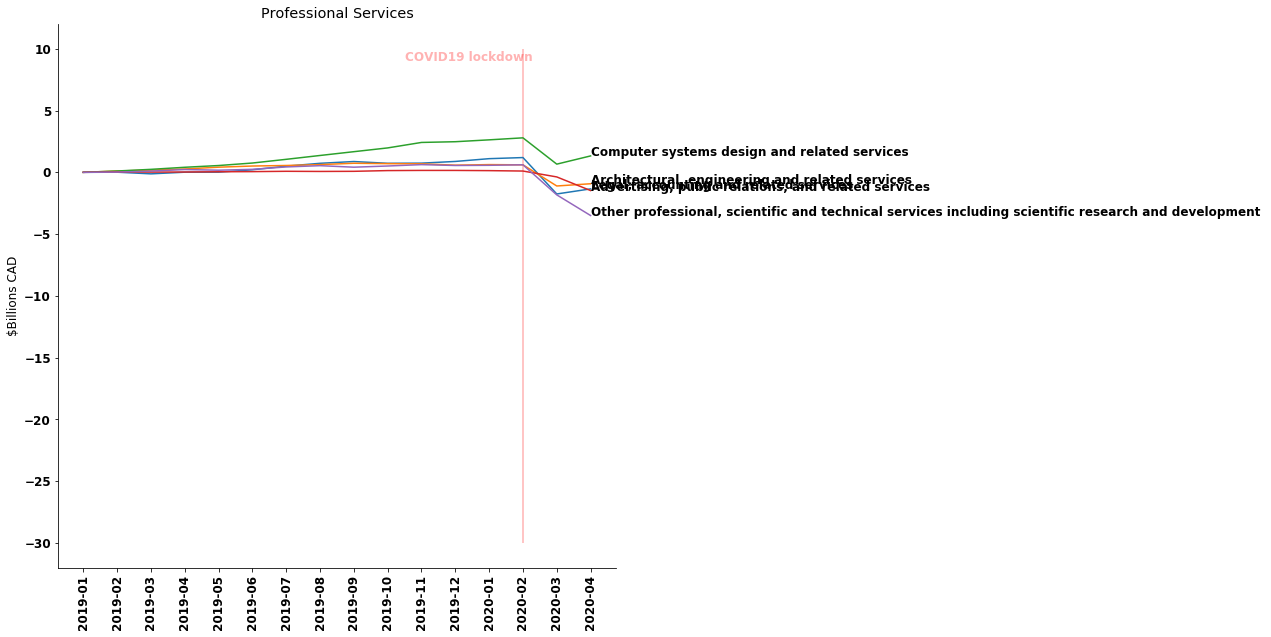

In [21]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Professional Services')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[54' in industry:
        print(industry)
        ax.plot(x,y, alpha = 1, label=industry)
        ax.annotate(industry[:industry.find('[')],(x.iloc[-1], y.iloc[-1]) )


#     else:
#         ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(2.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

plt.show()

Real estate [531]
Rental and leasing services and lessors of non-financial intangible assets (except copyrighted works) [53B]


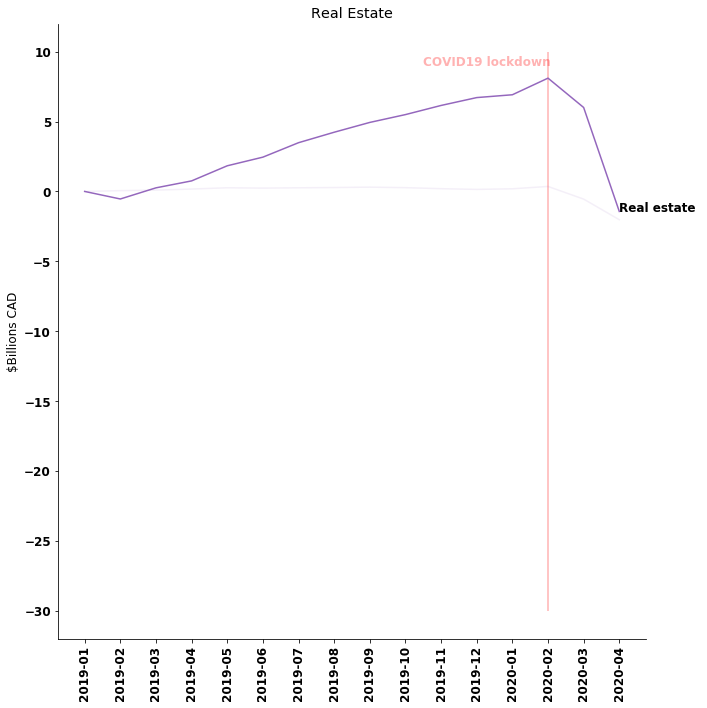

In [22]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Real Estate')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
color = '#9467bd'
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[53' in industry:
        print(industry)
        if '[531]' in industry:
            ax.plot(x,y, alpha = 1, label=industry, color=color)
            ax.annotate(industry[:industry.find('[')],(x.iloc[-1], y.iloc[-1]) )
        else:
            ax.plot(x,y, alpha = 0.1, label=industry, color=color)


#     else:
#         ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = 'COVID19 lockdown'
ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(1.05, 1.05))
# plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

plt.show()

# Employment

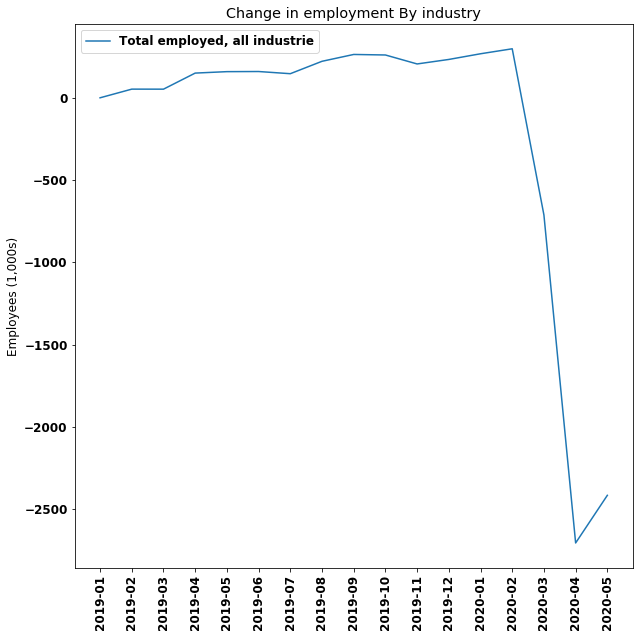

In [23]:
#Employment
# citation: Statistics Canada.  Table  14-10-0355-01   Employment by industry, monthly, seasonally adjusted and unadjusted, and trend-cycle (x 1,000)



df = pd.read_csv('data/employment_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()
# industries = [i for i in industries if i[-1]==']']  #needs this step to remove aggrregate classes such as all industries

plt.figure(figsize = (10,10))
plt.title('Change in employment By industry')
plt.ylabel('Employees (1,000s)')
plt.xticks(rotation = 90)
for industry in industries:
    if 'Total' in industry:
        columns = ['ref_date', 'value']
        temp_df = df[df['north american industry classification system (naics)']==industry][columns]
        first = temp_df.iloc[0][1]
        temp_df['change'] = temp_df['value'] - first
    #     temp_df['change'] = temp_df['value'].pct_change()
    #     temp_df['v_change'] = temp_df['change']*temp_df['value']

        x= temp_df['ref_date']
        y= temp_df['change']

        if temp_df.iloc[-2][-1] < -190:
            plt.plot(x,y, alpha = 1, label=industry[:industry.find('[')])
        else:
            plt.plot(x,y, alpha = 0.1, label=industry[:industry.find('[')])

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend()
plt.show()

In [24]:
industries

array(['Total employed, all industries', 'Goods-producing sector',
       'Agriculture [111-112, 1100, 1151-1152]',
       'Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]',
       'Utilities [22]', 'Construction [23]', 'Manufacturing [31-33]',
       'Services-producing sector',
       'Wholesale and retail trade [41, 44-45]',
       'Transportation and warehousing [48-49]',
       'Finance, insurance, real estate, rental and leasing [52-53]',
       'Professional, scientific and technical services [54]',
       'Business, building and other support services [55-56]',
       'Educational services [61]',
       'Health care and social assistance [62]',
       'Information, culture and recreation [51, 71]',
       'Accommodation and food services [72]',
       'Other services (except public administration) [81]',
       'Public administration [91]'], dtype=object)

# manufacturing

NameError: name 'm' is not defined

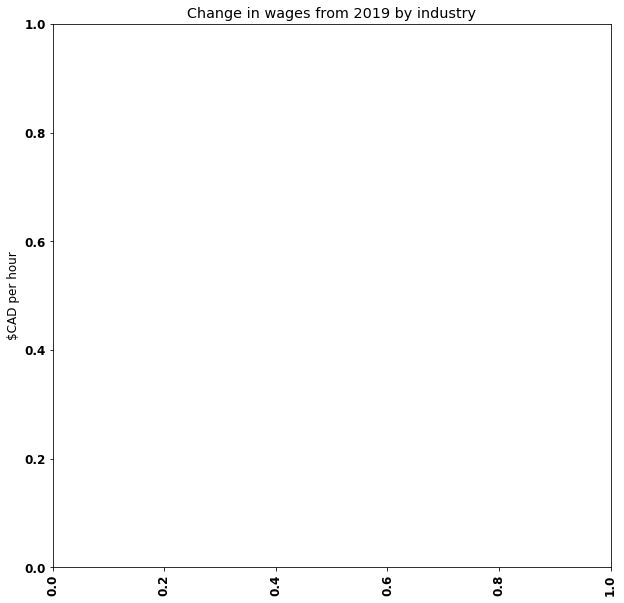

In [25]:
# Wages
# citation : Statistics Canada.  Table  14-10-0063-01   Employee wages by industry, monthly, unadjusted for seasonality

plt.figure(figsize = (10,10))
plt.title('Change in wages from 2019 by industry')
plt.ylabel('$CAD per hour')
plt.xticks(rotation = 90)


df = pd.read_csv('data/cpi_canada.csv')
df.columns = [x.lower() for x in df.columns]
df = df.query('uom == "Percent"')
measurements = df['alternative measures'].unique()

# for m in measurements:
temp_df = df[df['alternative measures']==measurements[1]]
x = temp_df['ref_date']
y = temp_df['value']

plt.plot(x,y, label = m[37:])

df = pd.read_csv('data/wages_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()
industries = [i for i in industries if i[-1]==']']  #needs this step to remove aggrregate classes such as all industries
# len(industries)

for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]
    temp_df['change'] = temp_df['value'].pct_change()
#     temp_df['v_change'] = temp_df['change']*temp_df['value']
    
    x= temp_df['ref_date']
    y= temp_df['change']*100
    
    plt.plot(x,y, alpha = 0.1, label=industry)

#     if temp_df.iloc[-2][-1] < 0:
#         plt.plot(x,y, alpha = 1, label=industry)
#     else:
#         plt.plot(x,y, alpha = 0.2, label=industry)




plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
lowlow = df.loc[110]['value']
highhigh = df.loc[230]['value']

n = 120
g = ((highhigh / lowlow)**(1/n))-1 # average gdp growth

v = 1630921
m = 4
y = 2020
projection = {}
while v<1994692:
    v *= (1+g)
    if m ==12:
        m = 1
        y += 1
    else:
        m+=1
    
    if len(str(m))==1:
        month = '0'+str(m)
    else:
        month = str(m)
    projection[str(y)+'-'+month] = v


In [ ]:
xx = []
yy = []
for k,v in projection.items():
    xx.append(k)
    yy.append(v/1_000_000)

In [ ]:
# overall GDP
# citation : Statistics Canada.  Table  14-10-0063-01   Employee wages by industry, monthly, unadjusted for seasonality


df = pd.read_csv('data/overallGDP_canada2.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()




plt.figure(figsize = (20,10))
plt.title('Canadian GDP in the last 20 years \n (with projected recovery)')
plt.ylabel('$Trillion CAD')

industry = industries[0]
columns = ['ref_date', 'value']

temp_df = df[df['north american industry classification system (naics)']==industry][columns]
first = temp_df.iloc[0][1]

temp_df['change'] = temp_df['value'] - first
temp_df['v_change'] = temp_df['change']/1_000

x= temp_df['ref_date']
y= temp_df['value']/1_000_000
plt.plot(x,y, color = 'red', alpha = 1, label='Actual GDP')
# plt.xticks(x, rotation=90)

        
        
plt.vlines(x=105, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s1 = '2008 subprime \n mortgage crisis'
plt.text(x=66, y = 2.01, s=s1, alpha = 0.3)


plt.vlines(x=241, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s2 = '2020 COVID-19 \n lockdown'
plt.text(x=201, y = 2.01, s=s2, alpha = 0.3)

plt.plot(xx,yy, label = "Projected Recovery", color = 'green', alpha = 0.7)
plt.xticks(rotation=90)

_, labels = plt.xticks()

for i in range(0,len(labels)):
    if i % 12 != 0:
        labels[i].set_visible(False)

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend()
# plt.savefig('figures/figure_2_Canada_overall_GDP_projected.png', dpi=300)
# plt.show()


In [ ]:
delta_08 = temp_df[(temp_df['ref_date'].str.contains('2008'))|(temp_df['ref_date'].str.contains('2009'))]
high = delta_08['value'].max()
low = delta_08['value'].min()


print(high/1_000)
print(low/1_000)
print((low - high)/1_000)
# over 9 months


In [ ]:
delta_08_r = temp_df[(temp_df['ref_date'].str.contains('2008'))|(temp_df['ref_date'].str.contains('2009'))|(temp_df['ref_date'].str.contains('2010'))|(temp_df['ref_date'].str.contains('2011'))]
delta_08_r

#102, 110, 129

In [ ]:
delta_cov = temp_df[(temp_df['ref_date'].str.contains('2019'))|(temp_df['ref_date'].str.contains('2020'))]
high = delta_cov['value'].max()/1_000
low = delta_cov['value'].min()/1_000
print(high)
print(low)
print((low - high))
# over 9 months

In [ ]:
delta_cov

In [ ]:
lowlow = df.loc[110]['value']
highhigh = df.loc[230]['value']

n = 120
g = ((highhigh / lowlow)**(1/n))-1 # average gdp growth

In [ ]:
df = pd.read_csv('data/sp500tsx.csv')
df.columns = [x.lower() for x in df.columns]

plt.figure(figsize = (20,10))
plt.title('S&P500 in the last 20 years')
plt.ylabel('$Thousands CAD')

x = df['date']
y = df['adj close']/1000

plt.plot(x,y, label='s&p 500')
plt.xticks(x, rotation=90)

_, labels = plt.xticks()

for i in range(0,len(labels)):
    if i % 12 != 0:
        labels[i].set_visible(False)

plt.vlines(x=103, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s1 = '2008 financial crisis'
plt.text(x=70, y = 16, s=s1, alpha = 0.3)


plt.vlines(x=240, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s2 = '2020 COVID-19 lockdown'
plt.text(x=197, y = 10, s=s2, alpha = 0.3)



plt.show()

In [ ]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()
# industry = industries[0]
plt.figure(figsize = (15,10))
plt.title('Change in Canadian GDP since 2019 by industry')
plt.ylabel('$Billions CAD')
plt.xticks(rotation = 90)
for industry in industries[16:]:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
    plt.plot(x,y, alpha = 0.3, label=industry)
#     if industry[-5:] == '[325]' :
#         plt.plot(x,y, alpha = 1, label=industry)

#     elif temp_df.iloc[-3][-1] >4 :
#         plt.plot(x,y, alpha = 1, label=industry)


#     else:
#         plt.plot(x,y, alpha = 0.1, label=industry)
    
# plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.vlines(x=13, ymin=-30, ymax=10, alpha = 1, color='red')
s2 = '2020 COVID-19 lockdown'
plt.text(x=9.5, y = 9, s=s2, alpha = 0.9, color='red')


plt.show()

In [ ]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()
# industry = industries[0]

fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Change in Canadian GDP since 2019 by industry')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
for industry in industries[16:]:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
    ax.plot(x,y, alpha = 0.3, label=industry)
#     if industry[-5:] == '[325]' :
#         plt.plot(x,y, alpha = 1, label=industry)

#     elif temp_df.iloc[-3][-1] >4 :
#         plt.plot(x,y, alpha = 1, label=industry)


#     else:
#         plt.plot(x,y, alpha = 0.1, label=industry)
    
# plt.legend(bbox_to_anchor=(1.1, 1.05))

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 1, color='red')
s2 = '2020 COVID-19 lockdown'
ax.text(x=7.5, y = 9, s=s2, alpha = 0.9, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.tight_layout()

plt.savefig('figures/figure_2_GDP_by_industry_all.png', dpi=300, bbox_inches='tight')

# plt.show()

In [ ]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 3 industry GDPs most affected by the lockdown')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

for industry in industries[16:]:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
    if temp_df.iloc[-1][-1] < -17:
#     if temp_df.iloc[-1][-1] < -10:
        ax.plot(x,y, alpha = 1, label=industry)
        ax.annotate(industry,(x.iloc[-1], y.iloc[-1]) )

    else:
        ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = '2020 COVID-19 lockdown'
# ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# plt.legend(bbox_to_anchor=(1.5, 1.05))
# plt.tight_layout()

plt.savefig('figures/figure_2_GDP_by_industry_worst.png', dpi=300, bbox_inches='tight')

# plt.show()

In [ ]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada3.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 3 industry GDPs unaffected by the lockdown')
ax.set_ylabel('$Billions CAD')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

for industry in industries[16:]:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
#     if temp_df.iloc[-1][-1] > 1.5 :
    if '[53' in industry:
        print(industry)
        ax.plot(x,y, alpha = 1, label=industry)
        ax.annotate(industry,(x.iloc[-1], y.iloc[-1]) )


#     else:
#         ax.plot(x,y, alpha = 0.05, label=industry)

ax.vlines(x=13, ymin=-30, ymax=10, alpha = 0.3, color='red')
s2 = '2020 COVID-19 lockdown'
# ax.text(x=9.5, y = 9, s=s2, alpha = 0.3, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

# plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.savefig('figures/figure_2_GDP_by_industry_best.png', dpi=300, bbox_inches='tight')

# plt.show()

In [ ]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('data/gdp_canada2.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
plt.figure(figsize = (10,10))
plt.title('Change in GDP by industry')
plt.ylabel('$Billions CAD')
plt.xticks(rotation = 90)
for industry in industries[16:]:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
    if temp_df.iloc[-1][-1] < -27:
#     if temp_df.iloc[-1][-1] >  0:
        plt.plot(x,y, alpha = 1, label=industry)
    else:
        plt.plot(x,y, alpha = 0.1, label=industry)
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
measurements[1]

In [ ]:
temp_df

In [ ]:
# Inflation
# citation : Statistics Canada.  Table  18-10-0256-01   Consumer Price Index (CPI) statistics, measures of core inflation and other related statistics - Bank of Canada definitions

df = pd.read_csv('data/cpi_canada.csv')
df.columns = [x.lower() for x in df.columns]
df = df.query('uom == "Percent"')
measurements = df['alternative measures'].unique()

plt.figure(figsize=(10,10))
plt.title('Measure of core inflation (Bank of Canada)')
plt.ylabel('(%)')
plt.xticks(rotation=90)
for m in measurements:
    temp_df = df[df['alternative measures']==m]
    x = temp_df['ref_date']
    y = temp_df['value']
    
    plt.plot(x,y, label = m[37:])
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
measurements

In [ ]:
#consumer confidence index
# citation: 

df_cci = pd.read_csv('data/CCI_canada.csv')
df_cci.columns = [x.lower() for x in df_cci.columns]

plt.figure(figsize=(20,10))
plt.title('Consumer Confidence Index for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)
x = df_cci['time']
y = df_cci['value']
    
plt.plot(x,y)

_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i+1) % 12 != 0:
        labels[i].set_visible(False)

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
#consumer confidence index
# citation: 

df_bci = pd.read_csv('data/BCI_canada.csv')
df_bci.columns = [x.lower() for x in df_bci.columns]

plt.figure(figsize=(20,10))
plt.title('Business Confidence Index for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)
x = df_bci['time']
y = df_bci['value']
    
plt.plot(x,y)

_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i-1) % 12 != 0:
        labels[i].set_visible(False)

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
df_cci.tail()

In [ ]:
#consumer confidence index
# citation: 

df_cli = pd.read_csv('data/CLI_canada.csv')
df_cli.columns = [x.lower() for x in df_cli.columns]

plt.figure(figsize=(20,10))
plt.title('Composite Leading Indicator for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)
x = df_cli['time']
y = df_cli['value']
    
plt.plot(x,y)

_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i-2) % 12 != 0:
        labels[i].set_visible(False)

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
#consumer confidence index
# citation: 


plt.figure(figsize=(20,10))
plt.title('Consumer Confidence Index for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)

#CCI
df_cci = pd.read_csv('data/CCI_canada.csv')
df_cci.columns = [x.lower() for x in df_cci.columns]
x = df_cci['time']
y = df_cci['value']
    
# BCI
df_bci = pd.read_csv('data/BCI_canada.csv')
df_bci.columns = [x.lower() for x in df_bci.columns]
x2 = df_bci['time']
y2 = df_bci['value']

# CLI
df_cli = pd.read_csv('data/CLI_canada.csv')
df_cli.columns = [x.lower() for x in df_cli.columns]

x3 = df_cli['time']
y3 = df_cli['value']



# plt.plot(x3,y3, label = 'cli')
plt.plot(x2,y2, label='bci')
plt.plot(x,y, label = 'cci')


_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i-1) % 12 != 0:
        labels[i].set_visible(False)

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()